# Proyecto Despliegue de Soluciones Analíticas.
###**Estimación de los niveles de obesidad en función de los hábitos alimentarios y la condición física de habitantes de América Latina**


**Integrantes:**
- Laura Camila Peralta Rivera
- Juan David Roldán Ruíz
- Jairo Rueda
- Diego Andrés García Montaño


###**Descripción**
Este estudio presenta una base de datos de 17 atributos y 2111 registros de México, Perú y Colombia,para estimar los niveles de obesidad de los individuos con base en sus hábitos alimenticios y condiciones físicas. Estos registros fueron etiquetados con la variable de clase NObesidad (Nivel de Obesidad), que permite clasificarlos usando los valores de Peso Insuficiente, Peso Normal, Sobrepeso Nivel I, Sobrepeso Nivel II, Obesidad Tipo I, Obesidad Tipo II y Obesidad Tipo III. El 77% de los datos se generaron sintéticamente con la herramienta Weka y el filtro SMOTE, y el 23% restante se obtuvo directamente de los usuarios a través de una plataforma web. Esta base de datos fue construida con el fin de permitir el desarrollo de herramientas analíticas para la identificación de los principales factores que generan la obesidad en los países Latino Americanos y de esta forma trabajar en estrategias para la prevención de la obesidad.



*Fuente de Datos:
https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition*


Dentro de la base de datos presentada para el proyecto, podemos encontrar que se compone de 17 variables, incluyendo NObesidad (Nivel de Obesidad), variable de respuesta con la cual proponemos responder a la pregunta: ¿el medio de transporte normalmente utilizado y el tiempo dedicado al uso de dispositivos tecnológicos lograran predecir la posibilidad de tener un BMI mayor a 30?

Adicional a la variable de respuesta, contamos con otras 16, las cuales fueron obtenidas a partir de las respuestas de la siguiente encuesta:


##Preguntas usadas para la recoleccion inicial de la informacion



1.   What is your gender?

*  Female
*  Male

2.  What is your age?
3.   what is your height?
4.   what is your weight?
5.   Has a family member suffered or suffers from overweight?

*   Yes
*   No

6.   Do you eat high caloric food frequently?

*   Yes
*   No

7.   Do you usually eat vegetables in your meals?

*   Never
*   Sometimes
*   Always

8.   How many main meals do you have daily?

*   Between 1 y 2
*   Three
*   More than three

9.   Do you eat any food between meals?


*   No
*   Sometimes
*   Frequently
*   Always


10.   Do you smoke?
*   Yes
*   No
11.   How much water do you drink daily?


*   Less than a liter
*   Between 1 and 2 L
*   More than 2 L


12.   Do you monitor the calories you eat daily?
*   Yes
*   No
13.   How often do you have physical activity?


*   I do not have
*   1 or 2 days
*   2 or 4 days
*   4 or 5 days

14.   How much time do you use technological devices such as
cell phone, videogames, television, computer and others?

*   0 - 2 hours
*   3 - 5 hours
*   More than 5 hours

15.   how often do you drink alcohol?

*   I do not drink
*   Sometimes
*   Frequently
*   Always

16.   Which transportation do you usually use?


*   Automobile
*   Motorbike
*   Bike
*   List item
*   Public Transportation
*   Walking

Para el cálculo de la variable de respuesta se estimó el índice de masa corporal, el cual se calcula de acuerdo con:
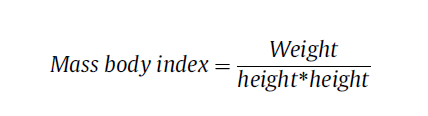







Como respuesta al cálculo de la variable respuesta Nivel de Obesidad, y de acuerdo con los estándares de la OMS, todo BMI calculado mayor a treinta se considera como obesidad y en función a esta definición y los diferentes niveles del índice y como se mencionó anteriormente, se crearon las siguientes clasificaciones:


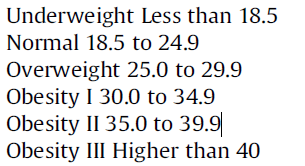

Para el análisis de la información, la base de datos se estructuró de acuerdo con la información obtenida de acuerdo con la encuesta, que está dividida principalmente en dos subconjuntos de información adicionales a la edad, al género, al peso y la altura comprendidos en Hábitos Alimenticios y Condición Física:

1.   Hábitos Alimenticios:

*   Frequent consumption of high caloric food (FAVC)
*   Frequency of consumption of vegetables (FCVC)
*   Number of main meals (NCP)
*   Consumption of food between meals (CAEC)
*   Consumption of water daily (CH20)
*   Consumption of alcohol (CALC)

2.   Condición Física:

*   Calories consumption monitoring (SCC)
*   Physical activity frequency (FAF)
*   Time using technology devices (TUE)
*   Transportation used (MTRANS)


##Análisis Descriptivo y exploración de datos.




In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Como primer paso se importa la base de datos
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df

Gender        Age    Height      Weight family_history_with_overweight  \
0     Female  21.000000  1.620000   64.000000                            yes   
1     Female  21.000000  1.520000   56.000000                            yes   
2       Male  23.000000  1.800000   77.000000                            yes   
3       Male  27.000000  1.800000   87.000000                             no   
4       Male  22.000000  1.780000   89.800000                             no   
...      ...        ...       ...         ...                            ...   
2106  Female  20.976842  1.710730  131.408528                            yes   
2107  Female  21.982942  1.748584  133.742943                            yes   
2108  Female  22.524036  1.752206  133.689352                            yes   
2109  Female  24.361936  1.739450  133.346641                            yes   
2110  Female  23.664709  1.738836  133.472641                            yes   

     FAVC  FCVC  NCP       CAEC SMOKE      CH2O  SCC       FAF       TUE  \
0      no   2.0  3.0  Sometimes    no  2.000000   no  0.000000  1.000000   
1      no   3.0  3.0  Sometimes   yes  3.000000  yes  3.000000  0.000000   
2      no   2.0  3.0  Sometimes    no  2.000000   no  2.000000  1.000000   
3      no   3.0  3.0  Sometimes    no  2.000000   no  2.000000  0.000000   
4      no   2.0  1.0  Sometimes    no  2.000000   no  0.000000  0.000000   
...   ...   ...  ...        ...   ...       ...  ...       ...       ...   
2106  yes   3.0  3.0  Sometimes    no  1.728139   no  1.676269  0.906247   
2107  yes   3.0  3.0  Sometimes    no  2.005130   no  1.341390  0.599270   
2108  yes   3.0  3.0  Sometimes    no  2.054193   no  1.414209  0.646288   
2109  yes   3.0  3.0  Sometimes    no  2.852339   no  1.139107  0.586035   
2110  yes   3.0  3.0  Sometimes    no  2.863513   no  1.026452  0.714137   

            CALC                 MTRANS           NObeyesdad  
0             no  Public_Transportation        Normal_Weight  
1      Sometimes  Public_Transportation        Normal_Weight  
2     Frequently  Public_Transportation        Normal_Weight  
3     Frequently                Walking   Overweight_Level_I  
4      Sometimes  Public_Transportation  Overweight_Level_II  
...          ...                    ...                  ...  
2106   Sometimes  Public_Transportation     Obesity_Type_III  
2107   Sometimes  Public_Transportation     Obesity_Type_III  
2108   Sometimes  Public_Transportation     Obesity_Type_III  
2109   Sometimes  Public_Transportation     Obesity_Type_III  
2110   Sometimes  Public_Transportation     Obesity_Type_III  

[2111 rows x 17 columns]

In [ ]:
print("Las dimensiones del dataframe con la base de datos de los datos sobre la obesidad y hábitos de vida:", df.shape, " es decir, hay ",df.shape[0], "registros y ",df.shape[1],"atributos o características. \n")
print("El tamaño de la base de datos, es decir la cantidad total de datos es:", df.size, "\n")
print("Las filas están organizádas a través de un índice en el siguiente rango: ", df.index, "\n")
print("Los nombres de las columnas dentro de las base de datos son:", df.columns, "\n")
print("\nLa información básica de la base de datos es: \n")
print(df.info())


Las dimensiones del dataframe con la base de datos de los datos sobre la obesidad y hábitos de vida: (2111, 17)  es decir, hay  2111 registros y  17 atributos o características. 

El tamaño de la base de datos, es decir la cantidad total de datos es: 35887 

Las filas están organizádas a través de un índice en el siguiente rango:  RangeIndex(start=0, stop=2111, step=1) 

Los nombres de las columnas dentro de las base de datos son: Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object') 


La información básica de la base de datos es: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age

In [ ]:
#Se analizan los valores unicos de las columnas categoricas con el fin de explorar los diversos valores que pueden tomar
categorical_columns = [col for col in df.columns if df[col].dtype == 'object']

for i in categorical_columns:
  print(i)
  print(df[i].unique())
  print("=" * 30)  # Separador visual entre columnas

Gender
['Female' 'Male']
family_history_with_overweight
['yes' 'no']
FAVC
['no' 'yes']
CAEC
['Sometimes' 'Frequently' 'Always' 'no']
SMOKE
['no' 'yes']
SCC
['no' 'yes']
CALC
['no' 'Sometimes' 'Frequently' 'Always']
MTRANS
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']
NObeyesdad
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']


Análisis estadístico de datos de tipo numérico.

In [ ]:
#Se extraen las columnas numéricas se extraen estadísticas descriptivas básicas
num_columns = [col for col in df.columns if df[col].dtype == 'float64']
df[num_columns].describe().T

count       mean        std    min        25%        50%         75%  \
Age     2111.0  24.312600   6.345968  14.00  19.947192  22.777890   26.000000   
Height  2111.0   1.701677   0.093305   1.45   1.630000   1.700499    1.768464   
Weight  2111.0  86.586058  26.191172  39.00  65.473343  83.000000  107.430682   
FCVC    2111.0   2.419043   0.533927   1.00   2.000000   2.385502    3.000000   
NCP     2111.0   2.685628   0.778039   1.00   2.658738   3.000000    3.000000   
CH2O    2111.0   2.008011   0.612953   1.00   1.584812   2.000000    2.477420   
FAF     2111.0   1.010298   0.850592   0.00   0.124505   1.000000    1.666678   
TUE     2111.0   0.657866   0.608927   0.00   0.000000   0.625350    1.000000   

           max  
Age      61.00  
Height    1.98  
Weight  173.00  
FCVC      3.00  
NCP       4.00  
CH2O      3.00  
FAF       3.00  
TUE       2.00

a través de la función .describe() se analizan las estadísticas decriptivas básicas de las columnas numéricas, se encuentran apartes interesantes, por ejemplo la edad "Age" tiene una media de 24.31 años, mientras que la desviación estándar es de 6.34 lo cual da una idea de la variabilidad de los datos con respecto a la media. El valor mínimo de edad es 14 mientras que el valor máximo es 61, esto brinda una idea del rango en el cual se tomaron las encuestas. Además de esto, la función también genera los cuartiles de 25%, 50% y 75% donde la edad toma valores de 19.94, 22.77 y 26 respectivamente lo cuál da muestra de cómo se distribuyen las muestras de edades dentro de la base de datos, puede notarse como las edades se encuentran en su mayoría distribuidas entre los 14 y 26 años.

Pueden también observarse otras variables como la estatura "Height", la cual tiene una media de 1.7 metros, mientras que la desviación estándar es de 0.0933 lo cual da una idea de la variabilidad de los datos con respecto a la media. El valor mínimo de la estatura es 1.45 metros mientras que el valor máximo es 1.98 metros, esto brinda una idea del rango en el cual se tomaron las encuestas. Además de esto, la función también genera los cuartiles de 25%, 50% y 75% donde la estatura toma valores de 1.63, 1.70 y 1.76 respectivamente lo cuál da muestra de cómo se distribuyen las muestras de estaturas dentro de la base de datos.

las otras variables se describen de la misma manera, sin embargo, se resalta también la variable peso "weight" la cual tiene una media de 86.58 kg, mientras que la desviación estándar es de 26.16 lo cual da una idea de la variabilidad de los datos con respecto a la media. El valor mínimo del peso es 39 kg mientras que el valor máximo es 173 kg, esto brinda una idea del rango en el cual se tomaron las encuestas. Además de esto, la función también genera los cuartiles de 25%, 50% y 75% donde el peso toma valores de 65.47 kg, 83 kg y 107.46 kg respectivamente lo cuál da muestra de cómo se distribuyen las muestras de epesos dentro de la base de datos.

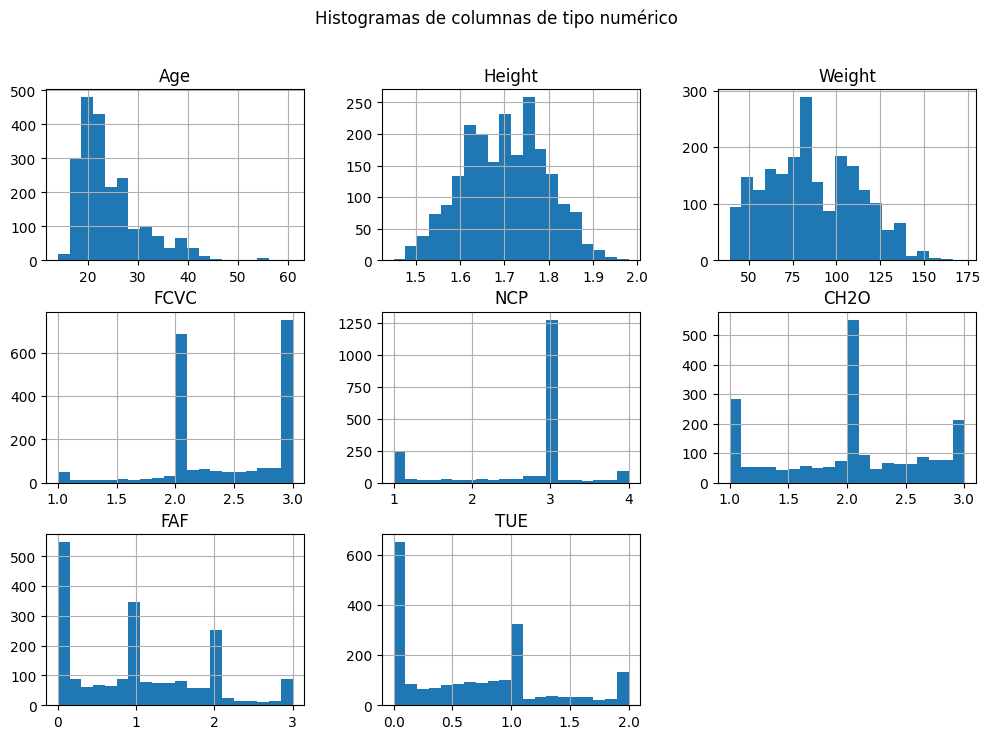

In [ ]:
# Histogramas
df[num_columns].hist(bins=20, figsize=(12, 8))
plt.suptitle("Histogramas de columnas de tipo numérico")
plt.show()

Se realizan histogramas con el fin de estudiar y entender la distribución y frecuencia de elementos a través de las variables. Puede observarse que por ejemplo para las variables de edad, peso y altura pareciera haber una distribución que pareciera tener una tendencia a la normalidad, teniendo la edad y el peso una acumulación de los datos hacia la izquierda de la campana de distribución, las otras variables tienen comportamientos diferentes donde parece haber predominancia de ciertos grupos de repuestas, por ejemplo para la frecuencia de actividad física (FCVC) los datos parecen concentrarse mayormente en el número tres seguido por el número dos, es decir la mayor parte de las personas en la encuesta realiza ejercicio entre 3 y 4 veces por semana seguido de 1 y 2 veces por semana, las otras preguntas también de selección múltiple tienen un comportamiento similar, por ejemplo en cuanto al número de comidas (NCP) la mayoría de encuestados aseguró consumir más de 3 comidas al día.

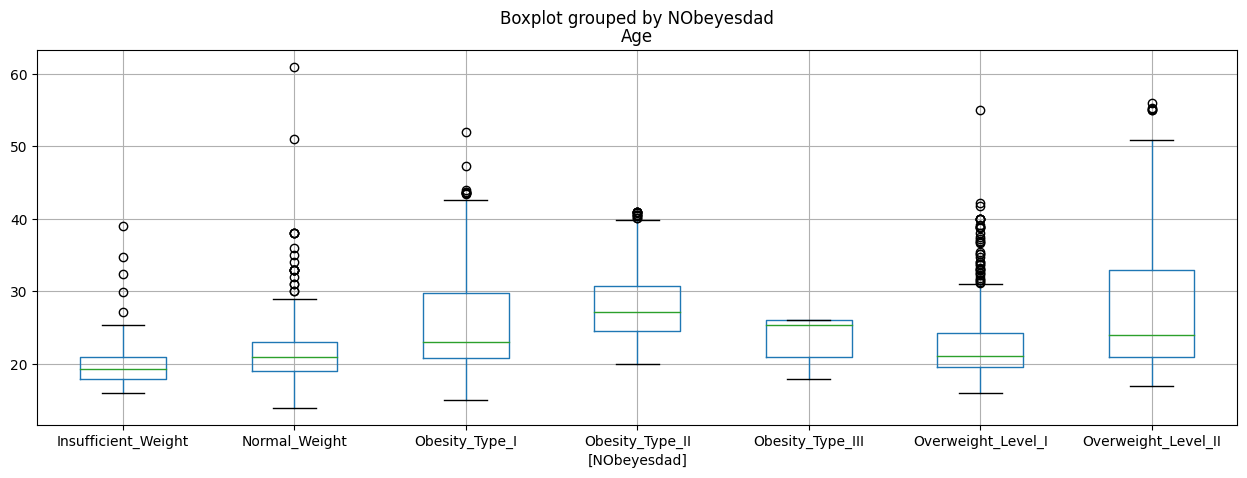

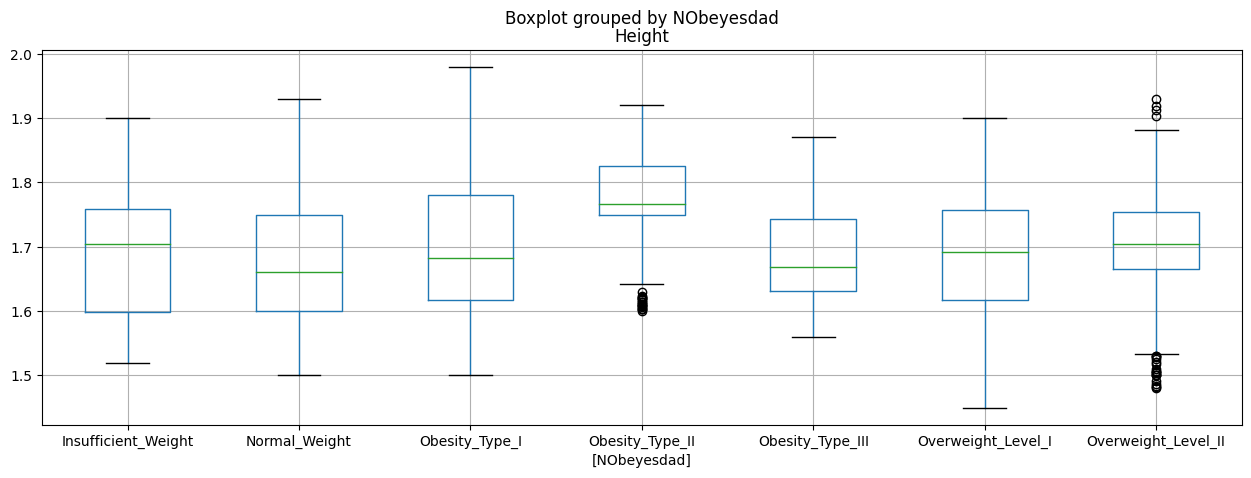

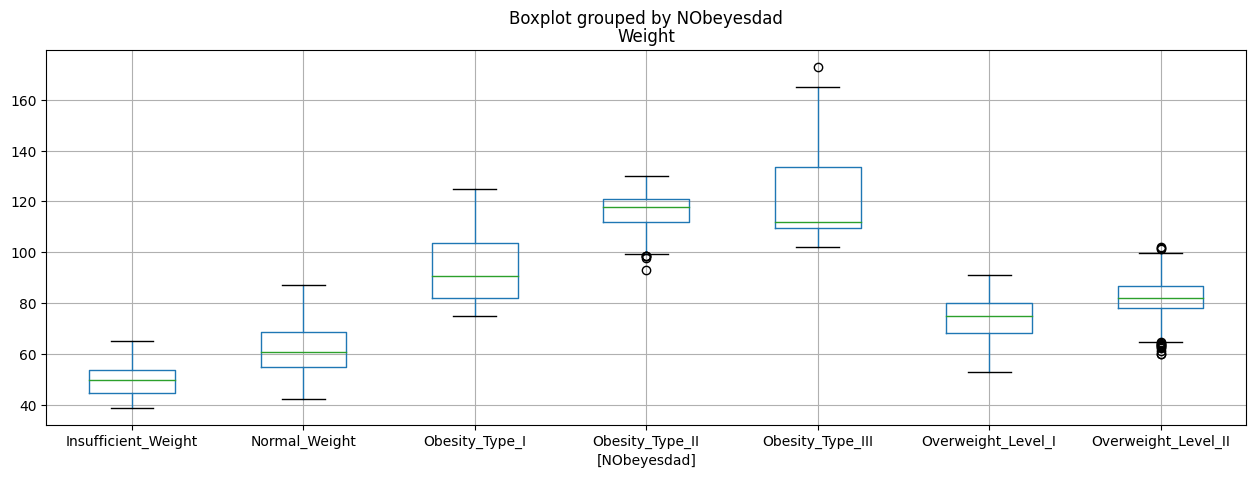

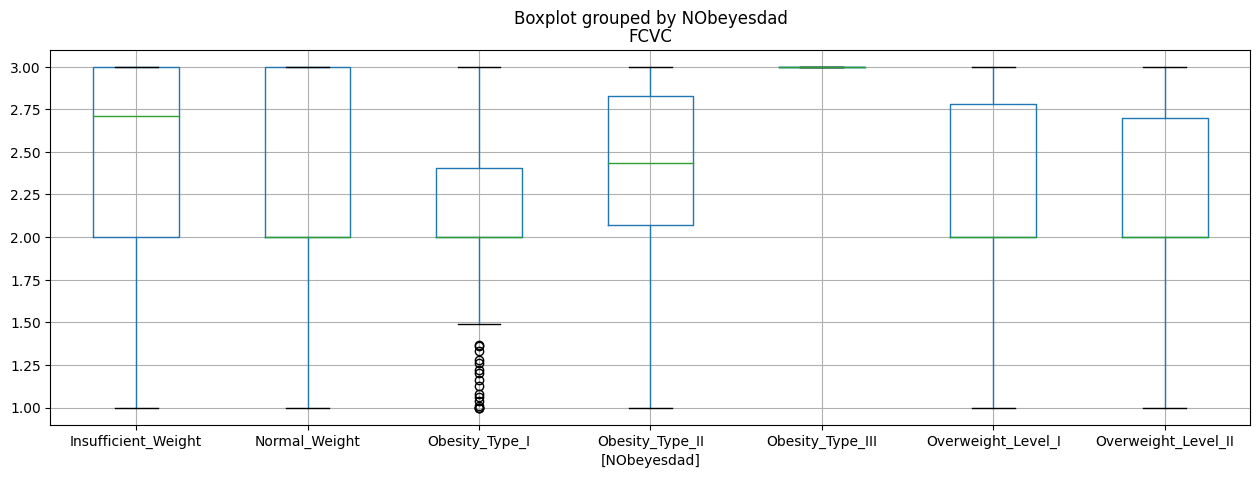

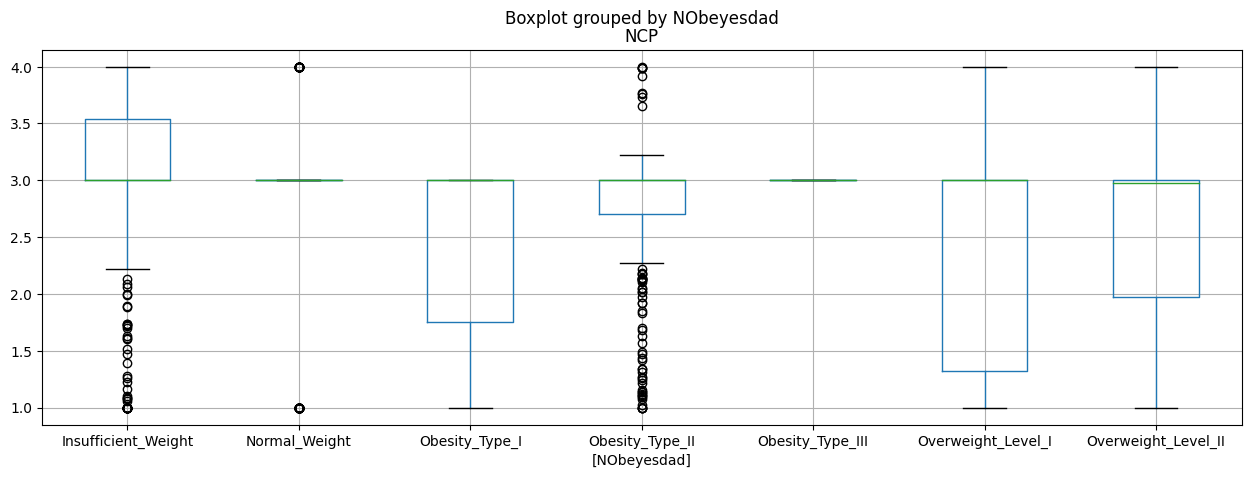

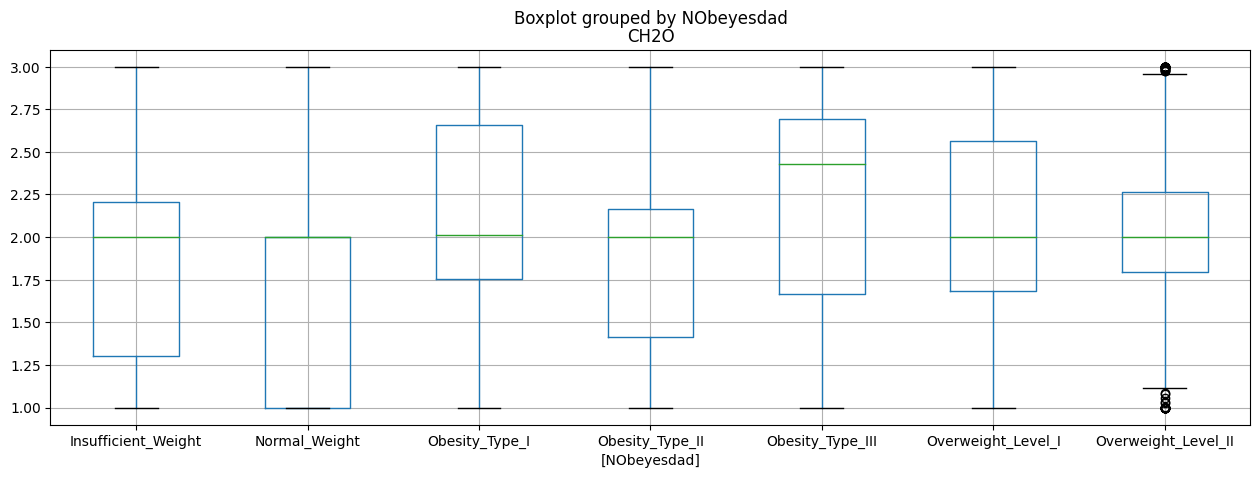

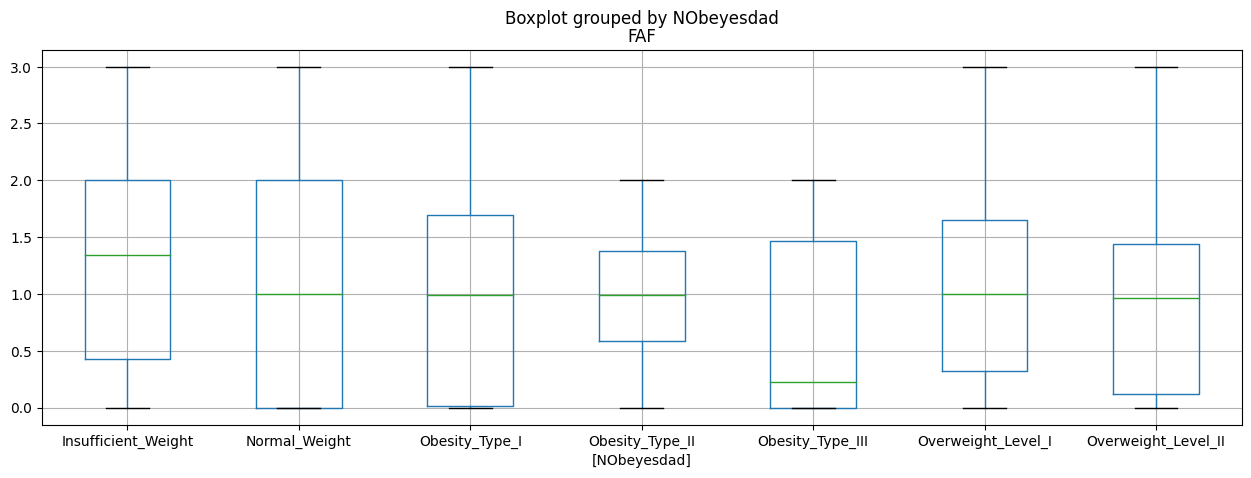

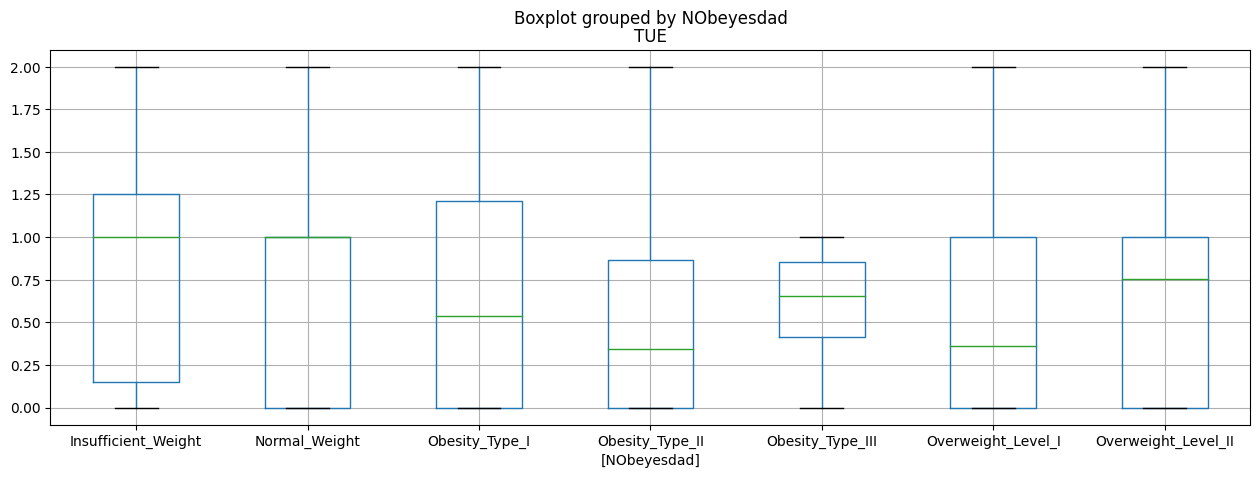

In [ ]:
for i in num_columns:
  df.boxplot(column=[i], by=['NObeyesdad'])
  fig = plt.gcf()
  fig.set_size_inches(15, 5)
  plt.show()


Con el fin de analizar un poco el tipo de obesidad con respecto a las diferentes variables, se procede a hacer diagramas de boxplot comparando cada una de las diferentes variables numéricas con respecto al nivel de obesidad con el fin de obtener una idea de cómo se distribuyen los diferentes tipo de obesidad con respecto a loa diferentes predictores de la base de datos.
Para esto, se agruparon cada uno de los predictores a través de la variable 'NObeyesdad' y luego se procedió a graficar cada boxplot mediante la librería de matplotlib iterando sobre las columnas numéricas.

El gráfico de caja o boxplot da una idea de cómo se distribuyen los datos a través de los percentiles, además de que brinda una idea sobre outlyers bajo la definición del rango intercuartílico que es la caja que se forma en los gráficos y agrupa los elementos entre el primer y tercer intercuartílico.
Puede observarse, por ejemplo, que, con respecto a la edad, para el tipo de obesidad 2 por ejemplo, el rango intercuartílico es más amplio con respecto a otros tipos de obesidad, puede observarse como este se encuentra entre 21 y 33 años aproximadamente para este tipo de obesidad, se observa también que por ejemplo para el tipo de obesidad 1, existen muchos outlyers con respecto a la edad, es decir existen muchos valores atípicos por encima de la regla del 150% del rango intercuartílico.

Otras observaciones que pueden realizarse con respecto a los gráficos boxplot es que por ejemplo el número de comidas parece tener un efecto considerable sobre los niveles de obesidad, se puede observar como las personas que consumen 3 comidas al día tienen una tendencia a un peso normal mientras que variaciones en esto se ven representadas en tipos de obesidad, también en el gráfico de boxplot que representa el peso se muestra que a mayor sea este, mayor es el tipo de obesidad lo cuál tiene mucho sentido porque el peso es uno de los valores que más influyen en el nivel de obesidad.


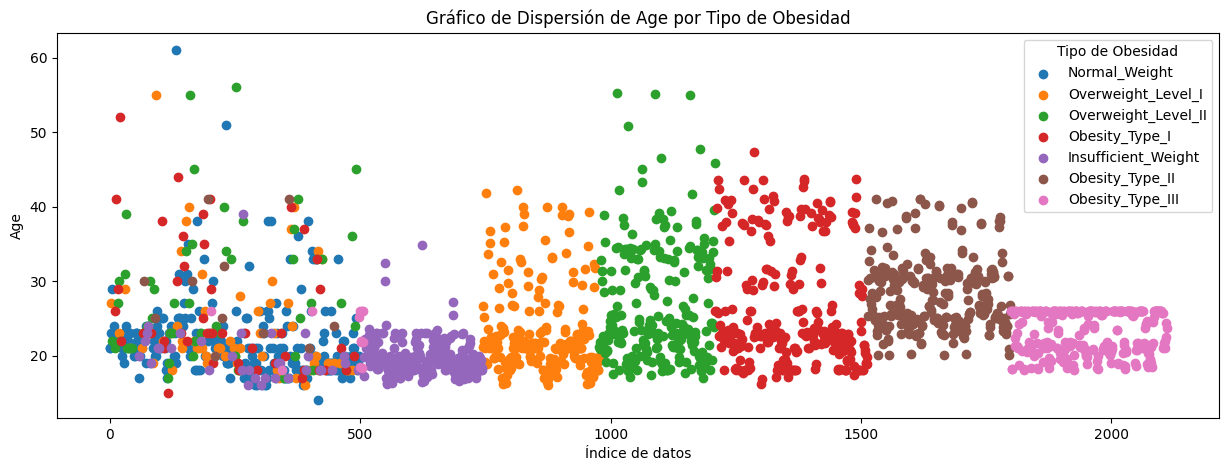

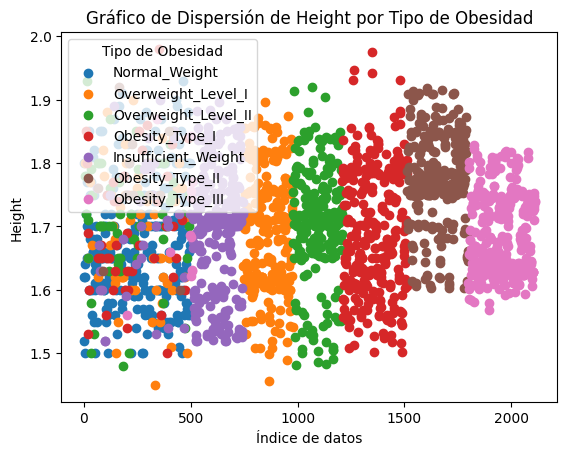

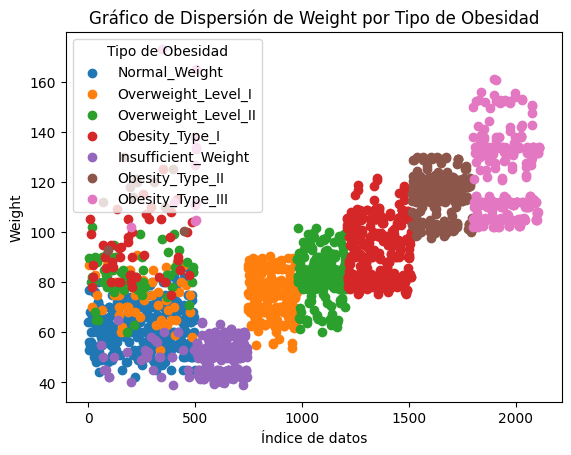

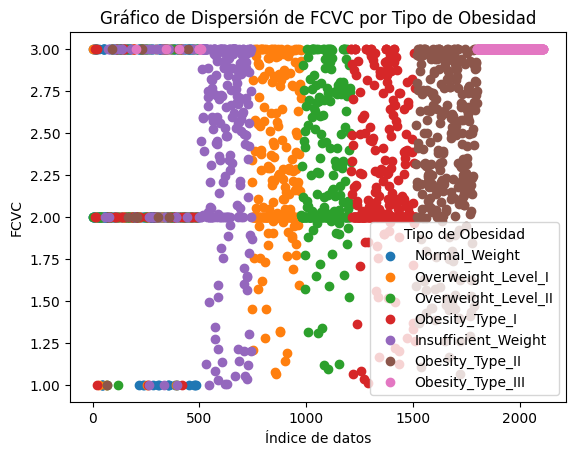

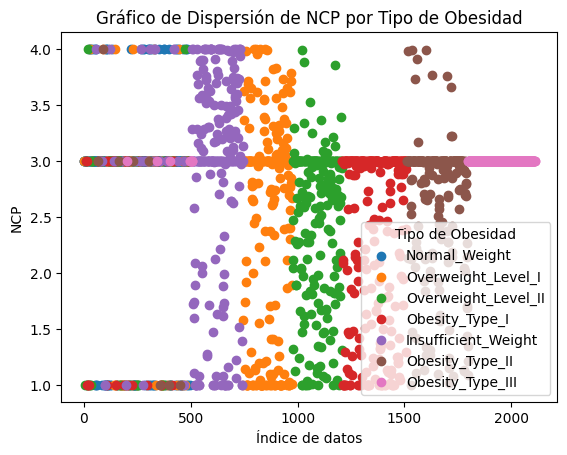

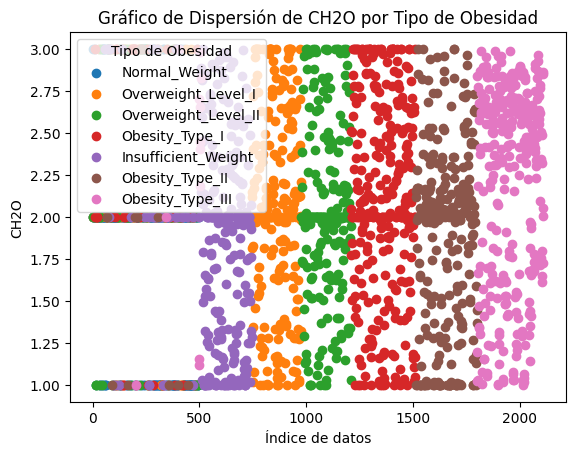

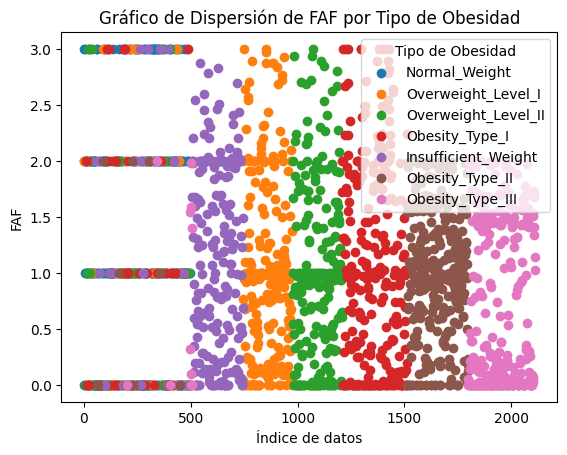

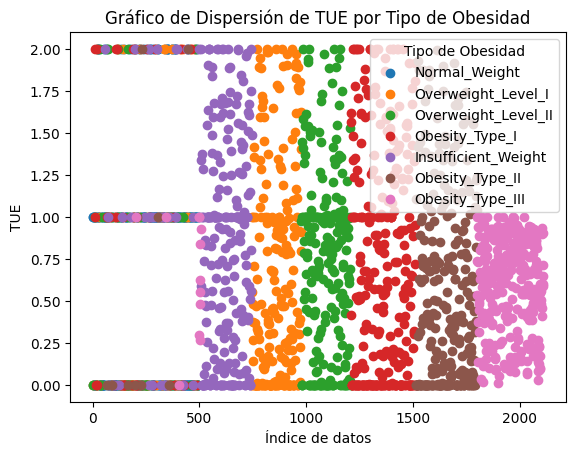

In [ ]:
  # Gráfico de dispersión por tipo de obesidad
plt.figure(figsize=(15, 5))
for i in num_columns:
    for obesity_type in df['NObeyesdad'].unique():
        subset = df[df['NObeyesdad'] == obesity_type]
        plt.scatter(subset.index, subset[i], label=obesity_type)
    plt.xlabel("Índice de datos")
    plt.ylabel(i)
    plt.legend(title='Tipo de Obesidad')
    plt.title(f"Gráfico de Dispersión de {i} por Tipo de Obesidad")
    plt.show()


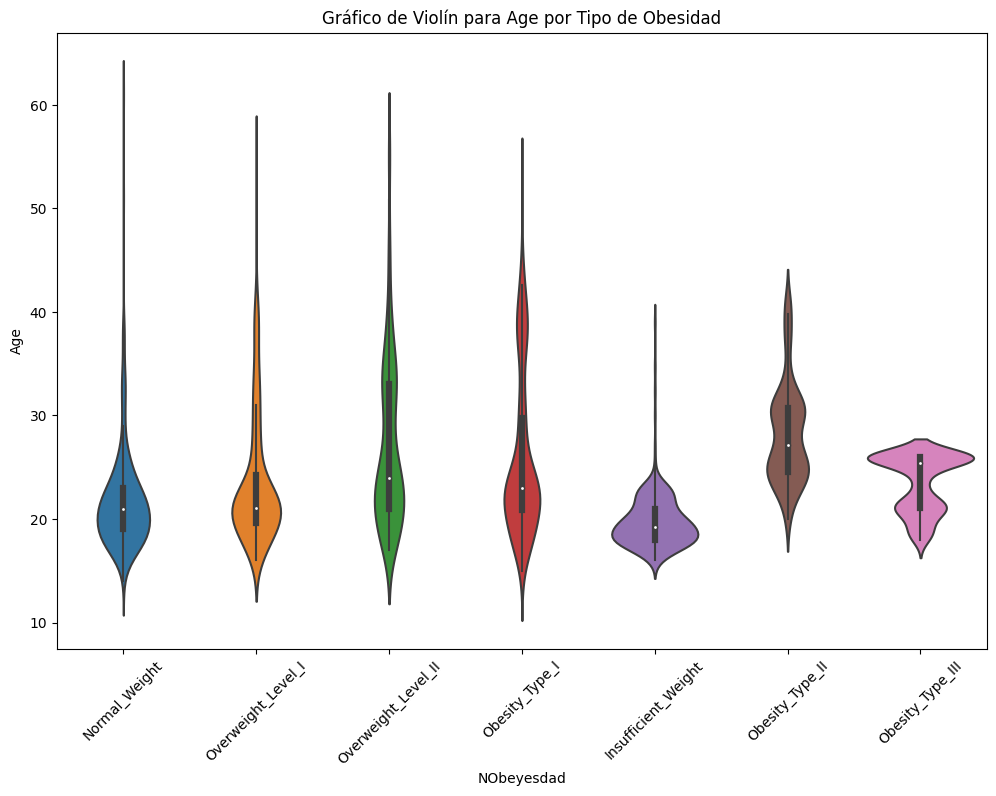

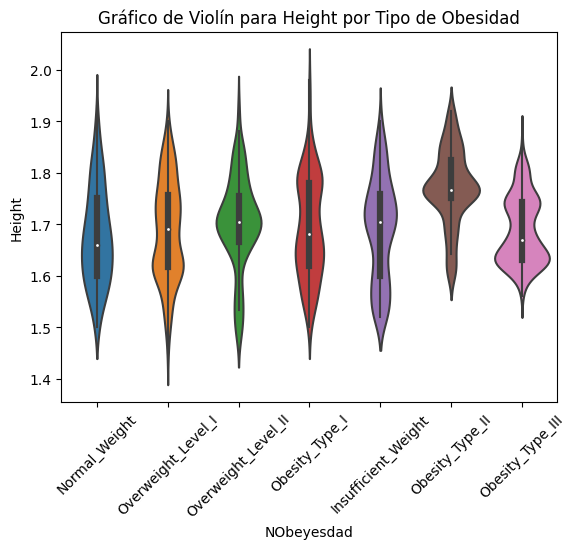

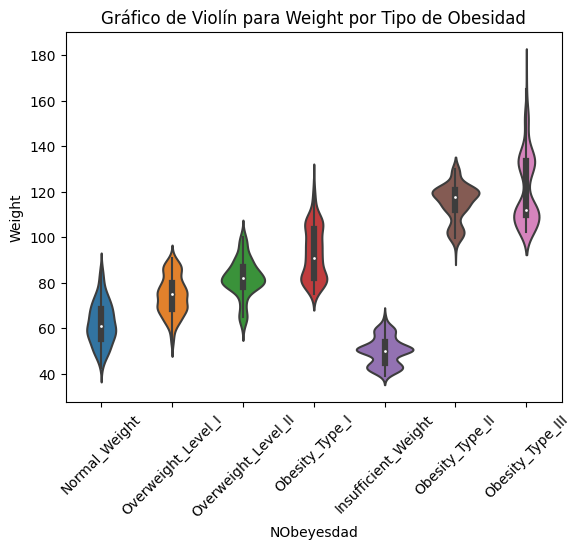

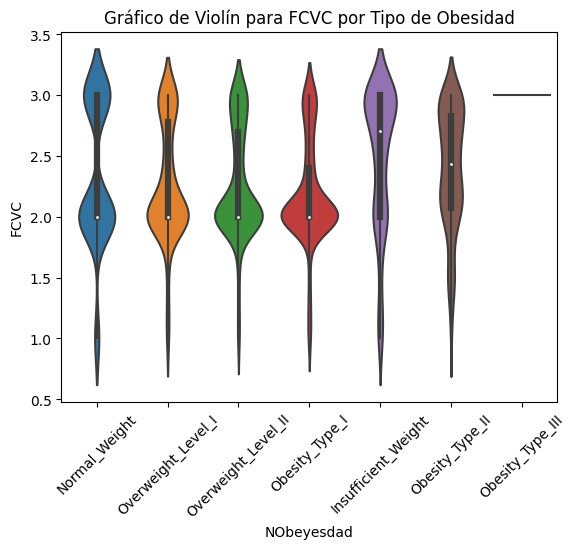

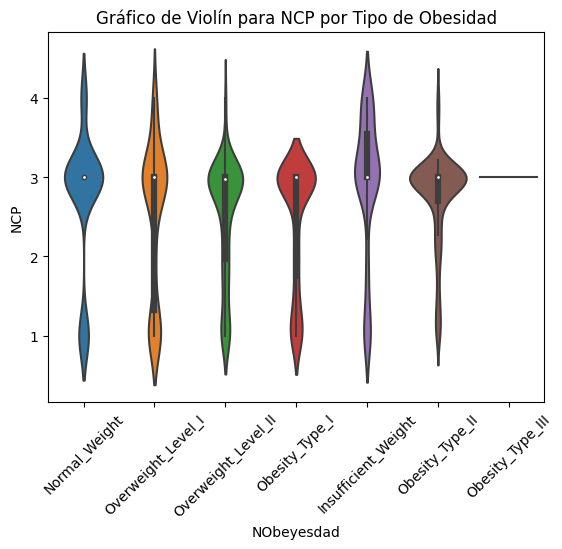

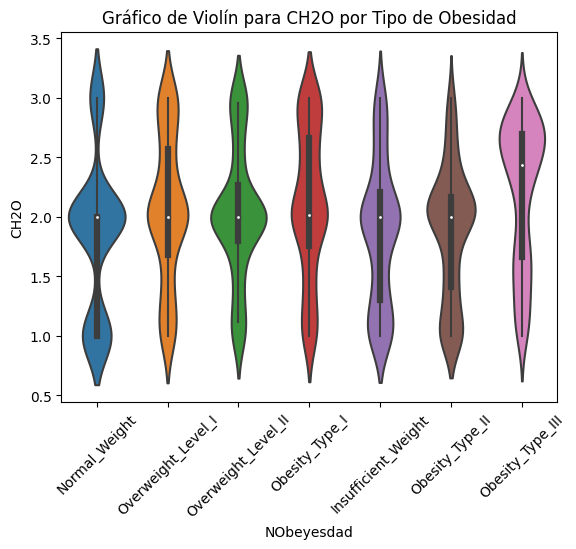

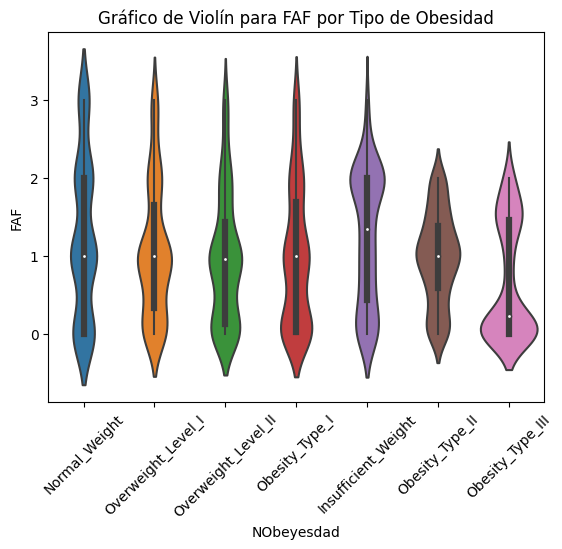

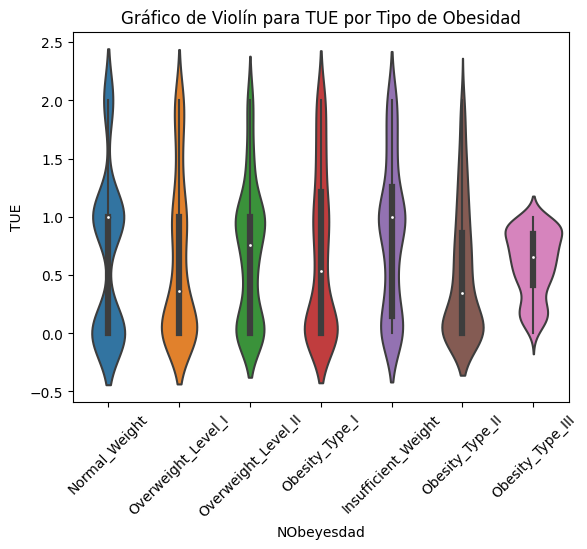

In [ ]:
# Gráfico de violín por tipo de obesidad para todas las columnas numéricas
plt.figure(figsize=(12, 8))
for column in num_columns:
    sns.violinplot(x='NObeyesdad', y=df[column], data=df)
    plt.title(f"Gráfico de Violín para {column} por Tipo de Obesidad")
    plt.xticks(rotation=45)
    plt.show()

Con el fin de apoyar los gráficos de boxplot, se hace también un análisis de dispersión con el fin de explorar de una forma visual el comportamiento de las variables con respecto al nivel de obesidad. Puede verse que por ejemplo los gráficos de la edad y de la altura no parece brindar mucha información con respecto al nivel de obesidad ya que los puntos están dispersos alrededor de todo el gráfico lo cuál es evidencia de no haber una aparente relación entre la edad o altura con el nivel de obesidad. Sin embargo, otras variables muestran patrones diferentes, la del peso por ejemplo muestra una tendencia a una relación directamente proporcional entre el peso y nivel de obesidad lo cuál tiene sentido y apoya el gráfico de boxplot, sin embargo, no es algo que se desconozca de antes. Las otras variables tienen comportamientos de puntos distribuidos de formas no uniformes no pudiéndose encontrar patrones específicos. Los grádficos de violín soportan las conclusiones realizadas.

In [ ]:
# Matriz de correlaciones
correlation_matrix = df[num_columns].corr()
correlation_matrix

Age    Height    Weight      FCVC       NCP      CH2O       FAF  \
Age     1.000000 -0.025958  0.202560  0.016291 -0.043944 -0.045304 -0.144938   
Height -0.025958  1.000000  0.463136 -0.038121  0.243672  0.213376  0.294709   
Weight  0.202560  0.463136  1.000000  0.216125  0.107469  0.200575 -0.051436   
FCVC    0.016291 -0.038121  0.216125  1.000000  0.042216  0.068461  0.019939   
NCP    -0.043944  0.243672  0.107469  0.042216  1.000000  0.057088  0.129504   
CH2O   -0.045304  0.213376  0.200575  0.068461  0.057088  1.000000  0.167236   
FAF    -0.144938  0.294709 -0.051436  0.019939  0.129504  0.167236  1.000000   
TUE    -0.296931  0.051912 -0.071561 -0.101135  0.036326  0.011965  0.058562   

             TUE  
Age    -0.296931  
Height  0.051912  
Weight -0.071561  
FCVC   -0.101135  
NCP     0.036326  
CH2O    0.011965  
FAF     0.058562  
TUE     1.000000

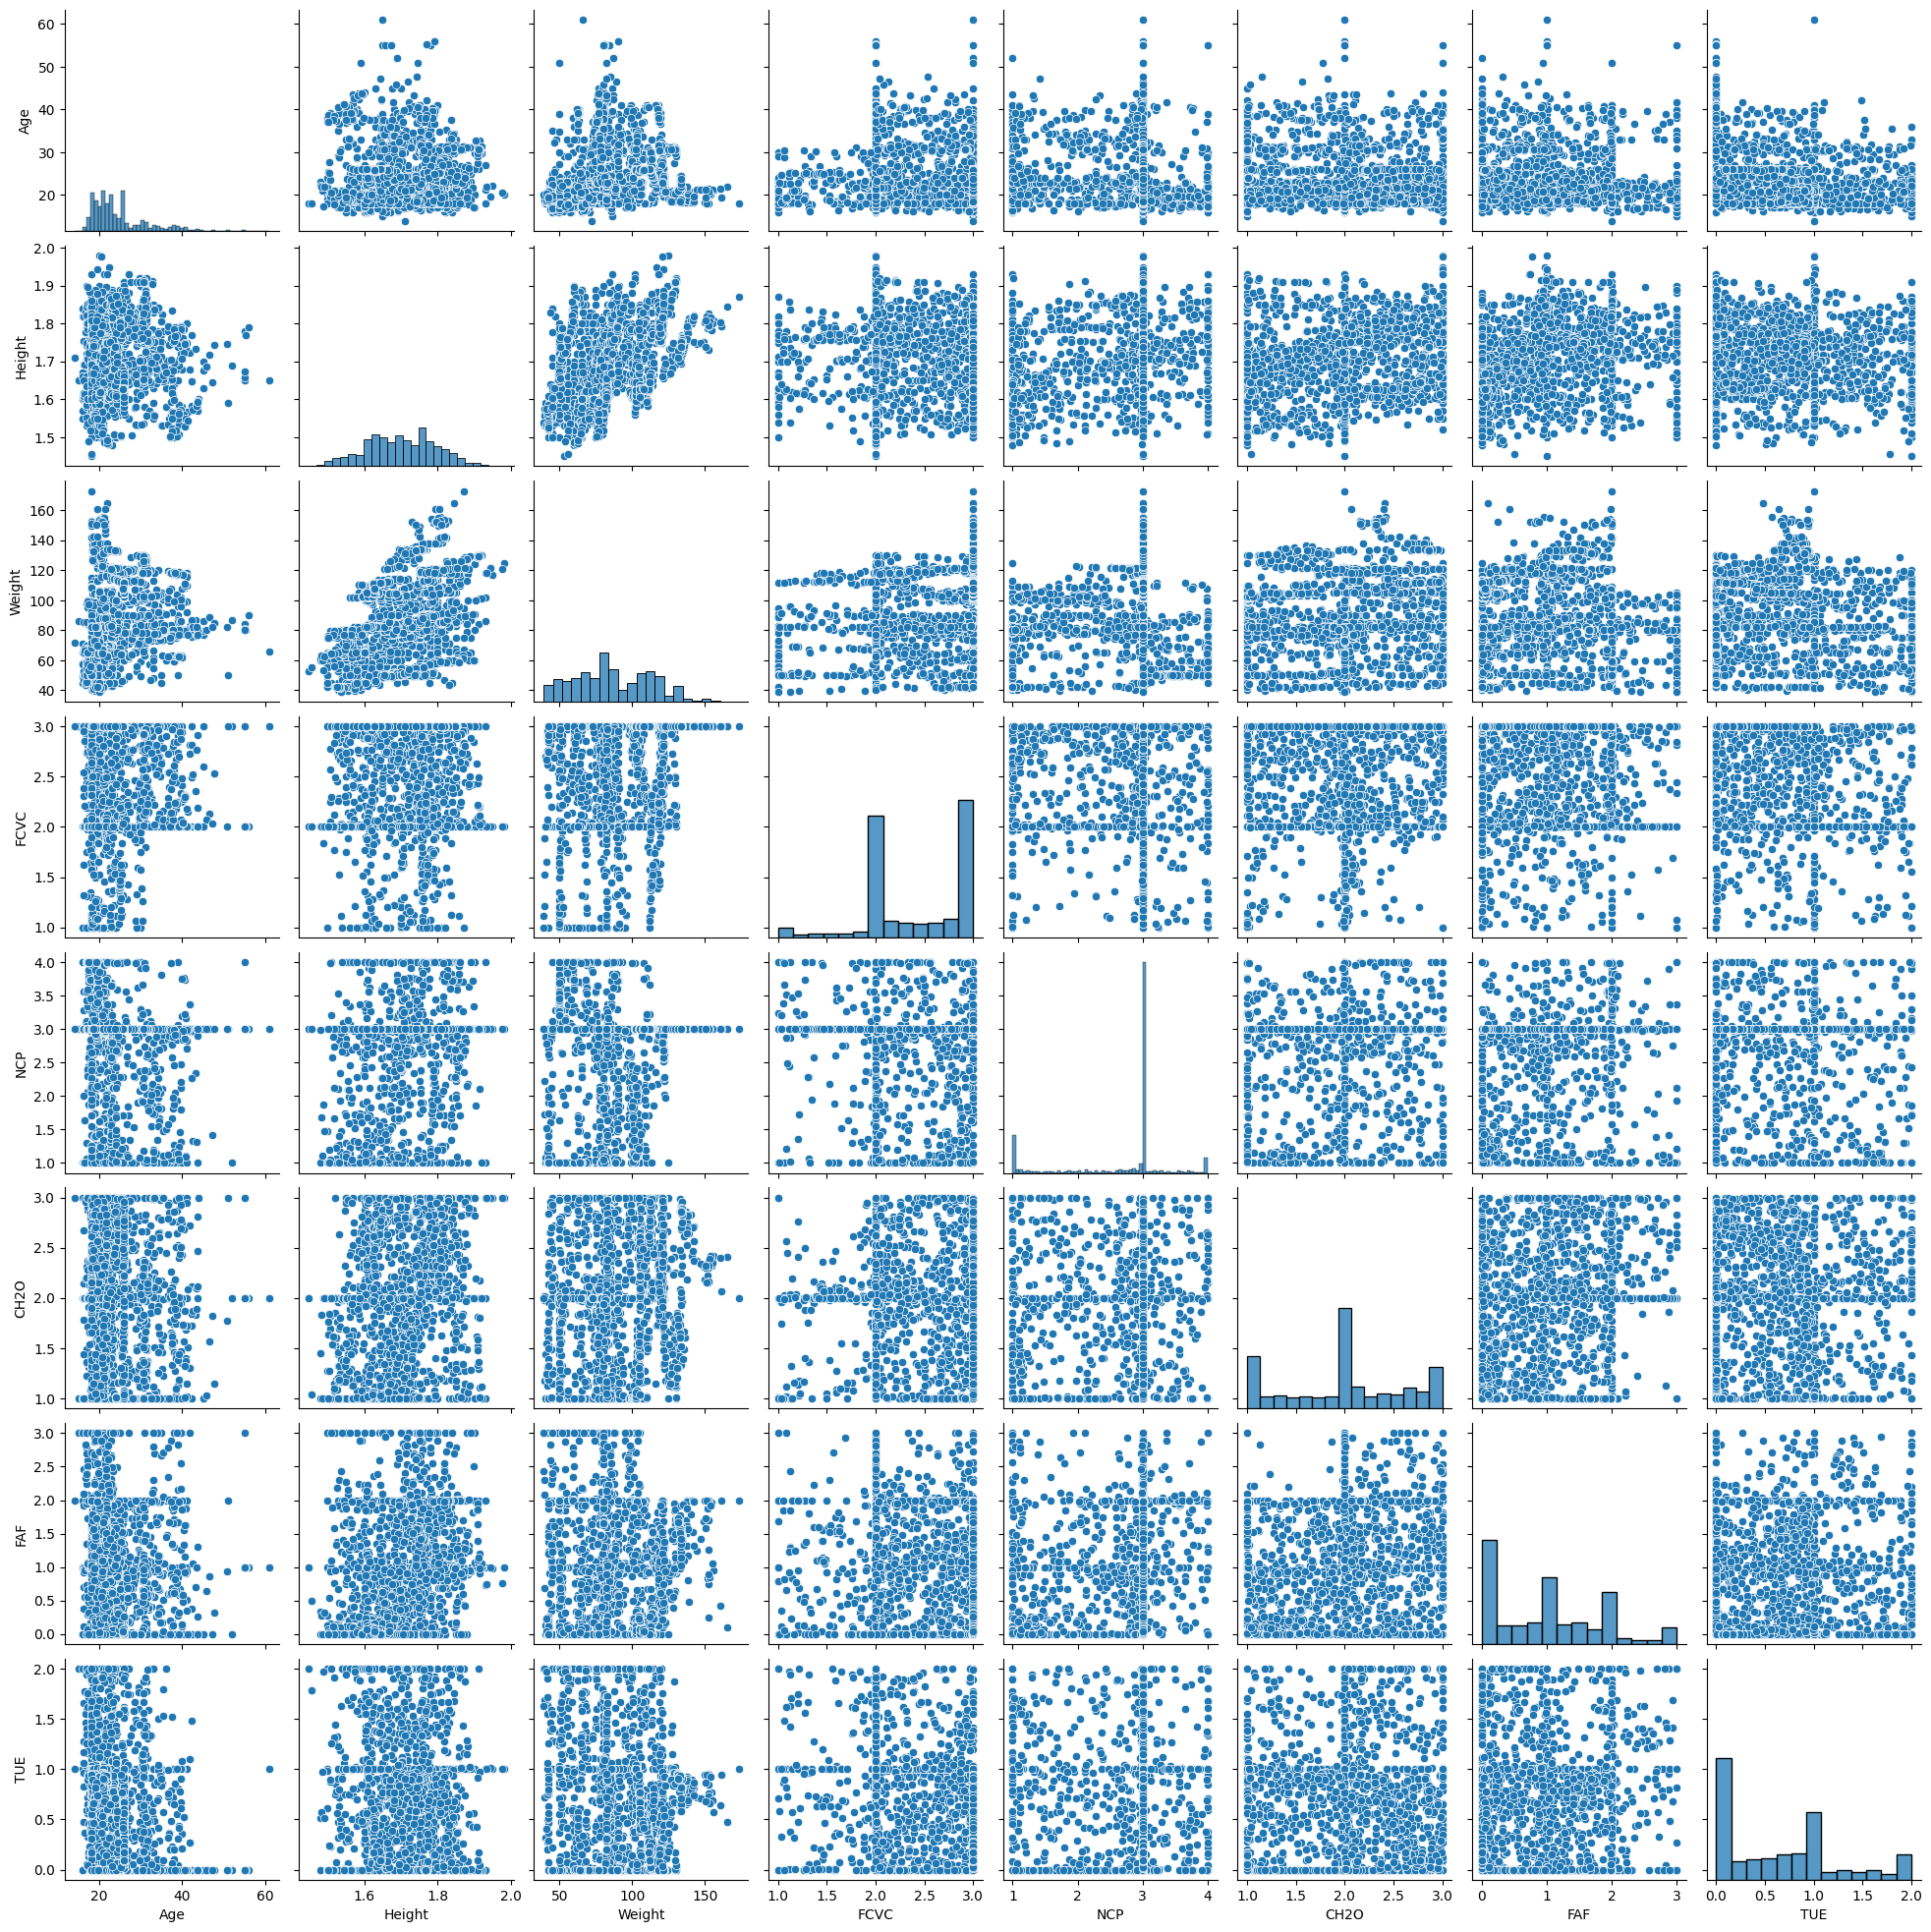

In [ ]:
# Correlograma (scatter plot matrix)
sns.pairplot(df[num_columns])
plt.show()

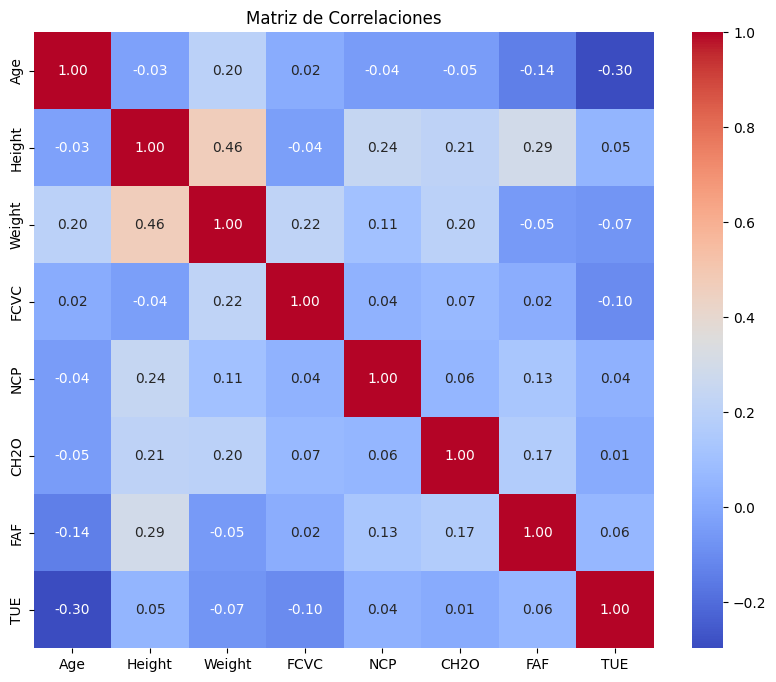

In [ ]:
# Mapa de calor de la matriz de correlaciones
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlaciones")
plt.show()

Con el fin de analizar la relación lineal entre las diferentes variables de tipo numérico se hace un análisis de correlación a través de una matriz de correlaciones en los predictores numéricos, un correlograma y un mapa de calor de la matriz de correlaciones.

Al analizar estos 3 elementos en conjunto, pueden observarse algunas características interesantes, por ejemplo, parece haber cierta relación lineal positiva entre las variables de peso y altura lo cuál tiene sentido, sin embargo, esta relación no parece ser tan fuerte ya que su valor es de 0.46. También parece haber una relación negativa entre la edad y el uso de dispositivos electrónicos (TUE) sin embargo esta relación es débil y tiene un valor de -0.30. No parecen presentarse relaciones lineales más fuertes entre las variables.


In [ ]:
grouped = df.groupby('NObeyesdad').describe().select_dtypes(include='number')
grouped

Age                                                   \
                     count       mean       std   min        25%        50%   
NObeyesdad                                                                    
Insufficient_Weight  272.0  19.783237  2.669511  16.0  18.000000  19.244594   
Normal_Weight        287.0  21.738676  5.096756  14.0  19.000000  21.000000   
Obesity_Type_I       351.0  25.884941  7.755700  15.0  20.875385  22.975526   
Obesity_Type_II      297.0  28.233785  4.868199  20.0  24.582200  27.186873   
Obesity_Type_III     324.0  23.495554  2.764324  18.0  21.020867  25.369387   
Overweight_Level_I   290.0  23.417674  6.125076  16.0  19.624431  21.045204   
Overweight_Level_II  290.0  26.996981  8.061061  17.0  21.000321  24.000000   

                                     Height            ...       FAF       \
                           75%   max  count      mean  ...       75%  max   
NObeyesdad                                             ...                  
Insufficient_Weight  21.000000  39.0  272.0  1.691117  ...  2.000000  3.0   
Normal_Weight        23.000000  61.0  287.0  1.676585  ...  2.000000  3.0   
Obesity_Type_I       29.781305  52.0  351.0  1.693804  ...  1.692518  3.0   
Obesity_Type_II      30.715160  41.0  297.0  1.771795  ...  1.376217  2.0   
Obesity_Type_III     26.000000  26.0  324.0  1.687559  ...  1.461248  2.0   
Overweight_Level_I   24.219639  55.0  290.0  1.687836  ...  1.646474  3.0   
Overweight_Level_II  33.000000  56.0  290.0  1.703748  ...  1.438672  3.0   

                       TUE                                               \
                     count      mean       std  min       25%       50%   
NObeyesdad                                                                
Insufficient_Weight  272.0  0.839459  0.643231  0.0  0.147990  1.000000   
Normal_Weight        287.0  0.675958  0.686697  0.0  0.000000  1.000000   
Obesity_Type_I       351.0  0.676743  0.687897  0.0  0.000000  0.537659   
Obesity_Type_II      297.0  0.515186  0.563862  0.0  0.000000  0.343635   
Obesity_Type_III     324.0  0.604623  0.281852  0.0  0.413031  0.656856   
Overweight_Level_I   290.0  0.612992  0.677714  0.0  0.000000  0.363159   
Overweight_Level_II  290.0  0.697275  0.588436  0.0  0.000000  0.754274   

                                    
                          75%  max  
NObeyesdad                          
Insufficient_Weight  1.254703  2.0  
Normal_Weight        1.000000  2.0  
Obesity_Type_I       1.213140  2.0  
Obesity_Type_II      0.863740  2.0  
Obesity_Type_III     0.853701  1.0  
Overweight_Level_I   1.000000  2.0  
Overweight_Level_II  1.000000  2.0  

[7 rows x 64 columns]

Finalmente, para terminar el análisis de variables numéricas y a través groupby, se agrupan los diversos tipos de obesidad alrededor de todas las variables dentro de la encuesta con el fin de obtener la información promedio de cómo se comportan las respuestas en la encuesta para cada variable según el tipo de obesidad, por ejemplo, para la variable edad, puede observarse que la obesidad tipo 3 tiene 324 registros, con una edad media de 23.49, una desviación de esta edad de 6.12 que indica la variabilidad con respecto a la media, un valor mínimo de 16 y un máximo de 55 lo cuál da idea del rango donde están los datos para este registro y con unos percentiles de 25%, 50% y 75% con unos valores de 21.02, 25.36 y 26 lo cual da idea de cómo se distribuyen los datos alrededor del rango de percentiles.

Análisis de variables categóricas.

In [ ]:
# Análisis descriptivo
categorical_df = df[categorical_variables]
print(categorical_df.describe())

       Gender family_history_with_overweight  FAVC       CAEC SMOKE   SCC  \
count    2111                           2111  2111       2111  2111  2111   
unique      2                              2     2          4     2     2   
top      Male                            yes   yes  Sometimes    no    no   
freq     1068                           1726  1866       1765  2067  2015   

             CALC                 MTRANS      NObeyesdad  
count        2111                   2111            2111  
unique          4                      5               7  
top     Sometimes  Public_Transportation  Obesity_Type_I  
freq         1401                   1580             351  


In [ ]:
for var in categorical_variables:
    frequency = df[var].value_counts()
    print(f"Frecuencia de {var}:")
    print(frequency)

Frecuencia de Gender:
Male      1068
Female    1043
Name: Gender, dtype: int64
Frecuencia de family_history_with_overweight:
yes    1726
no      385
Name: family_history_with_overweight, dtype: int64
Frecuencia de FAVC:
yes    1866
no      245
Name: FAVC, dtype: int64
Frecuencia de CAEC:
Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64
Frecuencia de SMOKE:
no     2067
yes      44
Name: SMOKE, dtype: int64
Frecuencia de SCC:
no     2015
yes      96
Name: SCC, dtype: int64
Frecuencia de CALC:
Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64
Frecuencia de MTRANS:
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64
Frecuencia de NObeyesdad:
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_I

Con el fin de analizar el comportamiento de las variables categóricas, a través de la función .describe() se proce a analizar el panorama de variables categóricas dentro de la base de datos.

La función arroja count que es el número de elementos en cada dimensión, unique que es el número de valores de respuesta de encuesta únicos, top que es el elemento que más se repite y freq que es la frecuencia con la cuál se repite ese último elemento.

Puede observarse que por ejemplo el género tiene dos elementos únicos y que el elemento que más se repite es "Male", es decir, hay más hombres en la base de datos, existen 1068 con respecto al total de 2111 elementos.

Se puede hacer un análisis similar para las otras variables, por ejemplo la variable SMOKE tiene dos elementos de respuesta posibles dentro de la encuesta (si y no) donde no es el valor más representativo con 2067 respuestas negativas.

Finalmente, se imprime una tabla por cada tipo de variable que permite observar el número de respuestas para cada una de las categorías de cada variable con el fin de tener una idea de las distribuciones de respuestas alrededor de las encuestas.

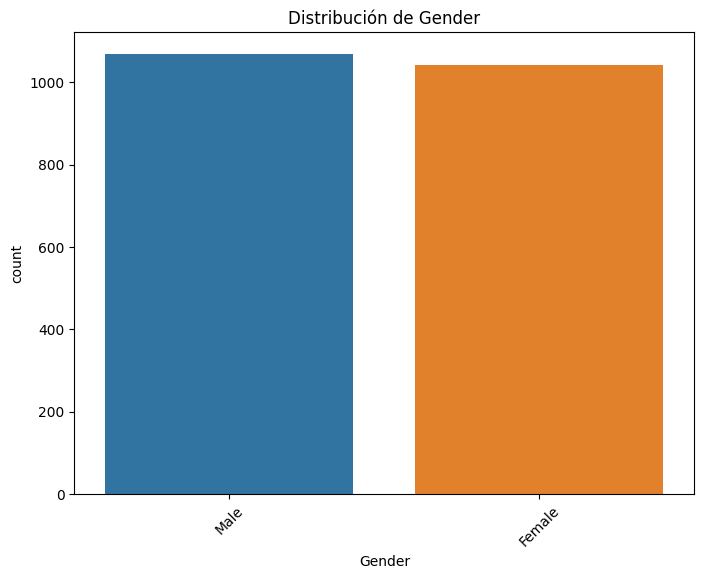

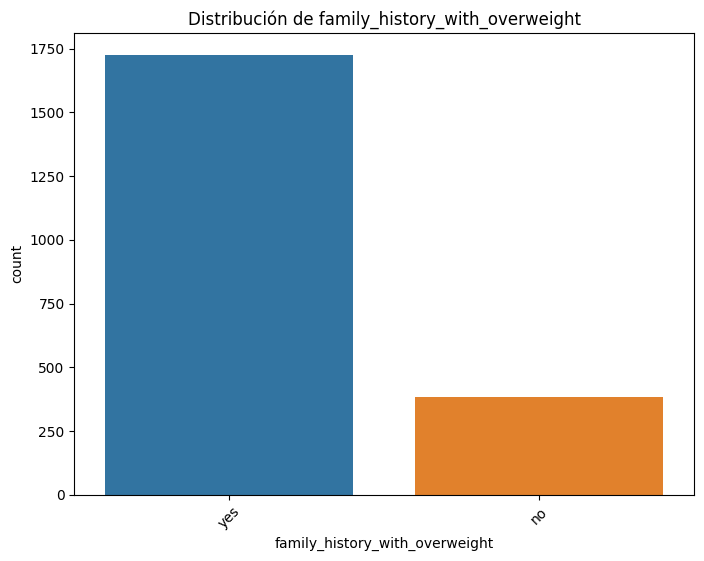

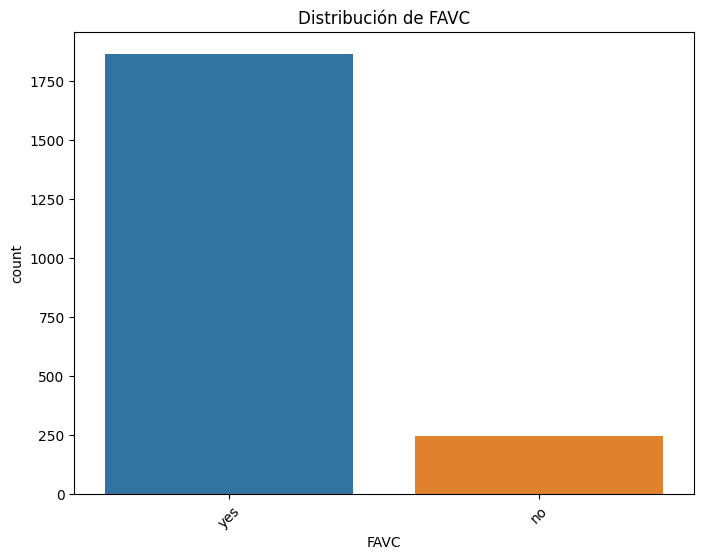

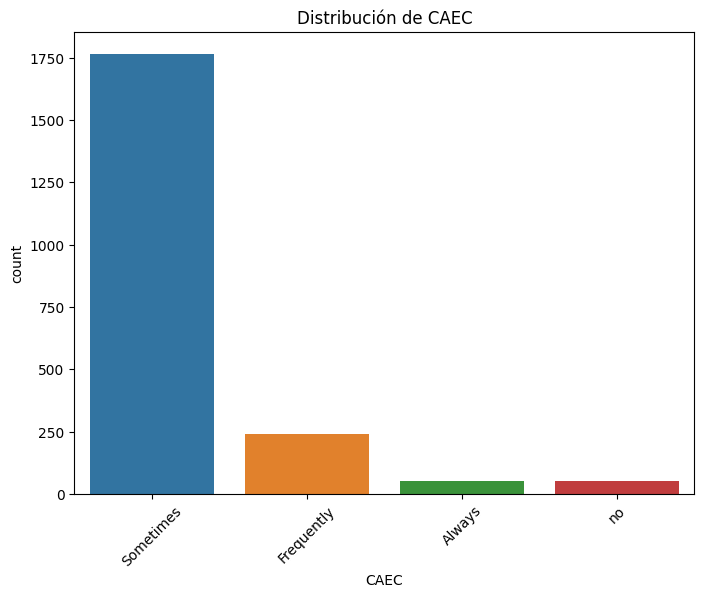

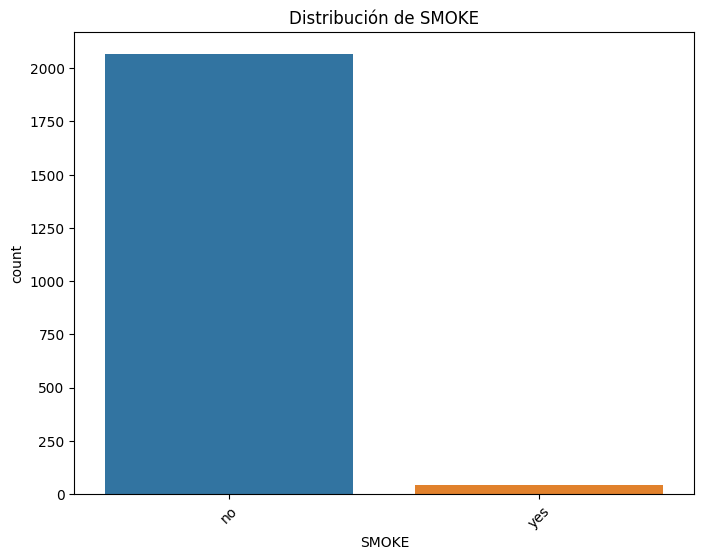

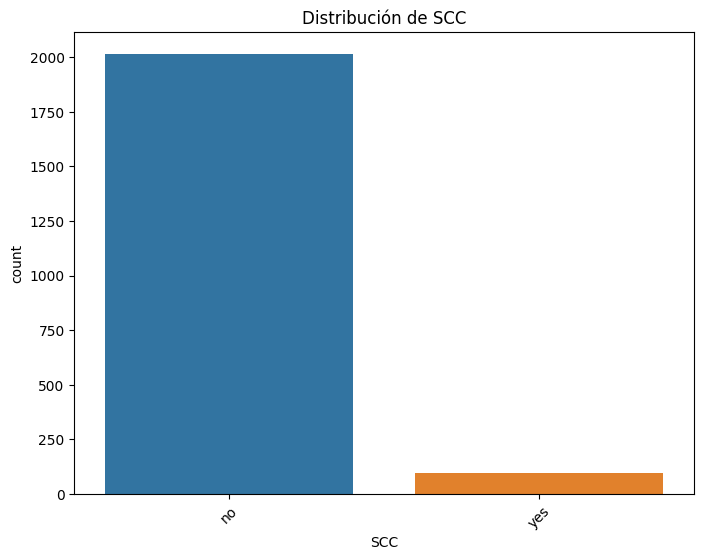

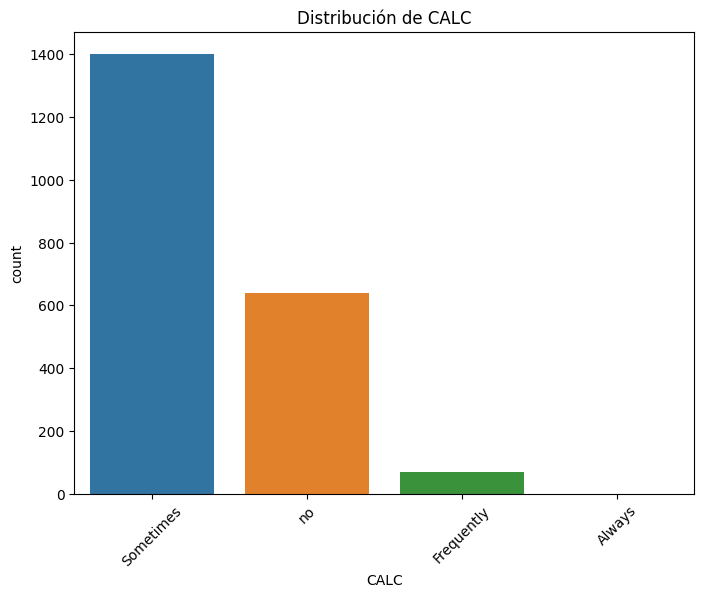

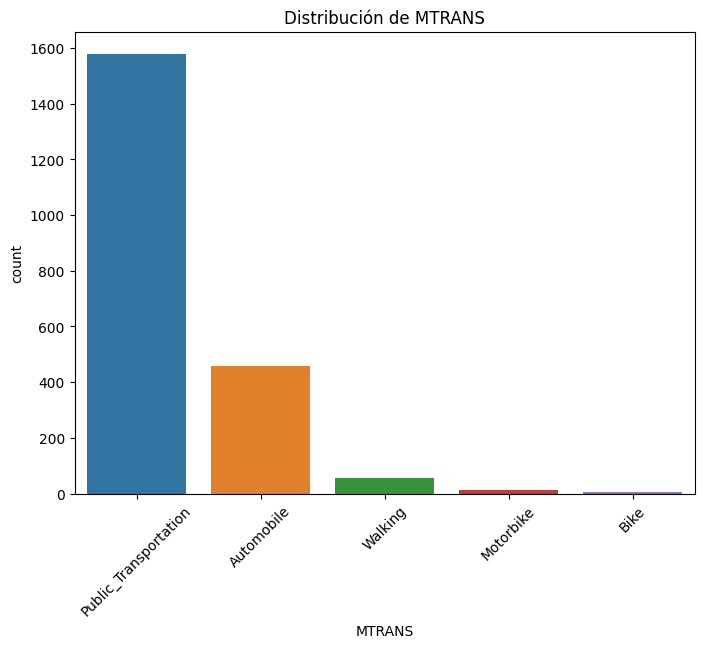

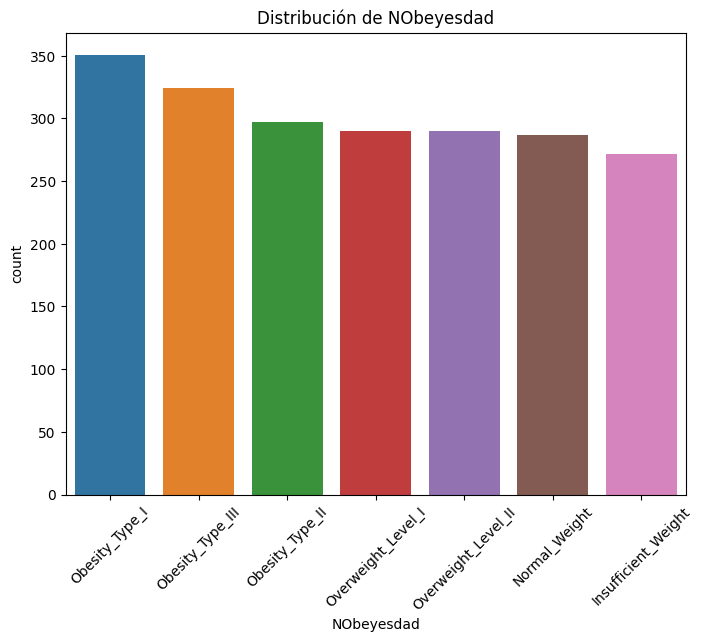

In [ ]:
# Gráficos
for column in categorical_variables:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=categorical_df, x=column, order=categorical_df[column].value_counts().index)
    plt.title(f'Distribución de {column}')
    plt.xticks(rotation=45)
    plt.show()

Se realizan gráficos de barras con el fin de explorar el balance de las categorías de cada dimensión de las variables categóricas de una forma visual.

Puede observarse como por ejemplo, el género parece estar balanceado dentro de la base de datos, si bien hay más hombres que mujeres, la diferencia parece ser mínima, sin embargo, otras variables muestran una alta predominancia de algunas categorías sobre otras por ejemplo, en la base de datos la mayoría de personas tiene historial en la familia de obesidad, también, la mayoría de personas es consumidora de alimentos altos en calorías, la mayoría no fuman, no monitorean las calorías que consumen, usa el transporte público y presenta obesidad tipo 1.  


In [ ]:

#Variables a conservar : SMOKE si fuma o no, CALC cantidad de alchool que consume, NCP comidas al día, CH2O litros agua al día,FAF qué tan seguido se ejercita, TUE tiempo usando dispositivos electrónicos, MTRANS medio de transporte, FCVC frecuencia consumo vegetales
df = df.drop(columns=['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'CAEC', 'SCC', 'FAF'])

Antes de desarrollar los modelos, se hizo una selección de variables, ya que la pregunta de negocio se centra en predecir el nivel de obesidad según los hábitos, se segmentó un poco la información de la base de datos inicial, conservando solamente 8 variables relacionadas a los hábitos de los individuos, al segmentar también enfocamos el proyecto a que la herramienta final solamente haga 8 preguntas a los usuarios finales en lugar de un número más alto de estas, las variables elegidas s Variables a conservar :  

*   SMOKE, que determina si la persona fuma o no.
*   CALC, que explica la cantidad de alcohol que consume la persona.
*   NCP que es el número de comidas ingeridas al día.
*   CH2O que indica los litros agua consumidos al día.
*   FAF indica qué tan seguido se ejercita la persona.  
*   TUE que representa el tiempo que la persona usa dispositivos electrónicos.
*   MTRANS que representa el medio de transporte usado por la persona.
*   FCVC que es la frecuencia del consumo de vegetales.

In [ ]:
#Se separa la acoluma a predecir en el modelo de machine learning y también se vuelve binaria la variable de respuesta
y = df["NObeyesdad"]
df = df.drop(columns=['NObeyesdad'])


#Conversión de variables categóricas binarias a unos y ceros

df['SMOKE'] = df['SMOKE'].map({'yes': 1, 'no': 0})


catcols = df.select_dtypes(exclude = ['int64','float64']).columns
intcols = df.select_dtypes(include = ['int64']).columns
floatcols = df.select_dtypes(include = ['float64']).columns

# one-hot encoding para variables categóricas
df = pd.get_dummies(df, columns = catcols)

# minmax scaling para variabls numéricas
for col in df[floatcols]:
    df[col] = MinMaxScaler().fit_transform(df[[col]])

for col in df[intcols]:
    df[col] = MinMaxScaler().fit_transform(df[[col]])

print('Nuevo número de de variables: %d'%(df.shape[1]))

Nuevo número de de variables: 16


Luego se hizo un preprocesamiento de los datos donde básicamente se convierten a números las variables binarias categóricas que contienen información de texto, luego se realiza la técnica de “one hot encoding” para variables de más de dos categorías con el fin de convertir la información de estas en variables binarias numéricas, también se escalan las variables de tipo decimal con el fin de mantener una misma escala en los modelos. Se dividen las bases de datos en conjuntos de test y pruebas y se procede a realizar varios modelos de clasificación para variables categóricas no binarias (ya que se quiere predecir el tipo de obesidad 1, 2, 3, desnutrición o peso normal)

In [ ]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print("=" * 30)  # Separador visual entre columnas

FCVC
[0.5       1.        0.        0.725109  0.9400805 0.50438   0.7982895
 0.7957195 0.6963325 0.0619695 0.513787  0.829056  0.94313   0.8572235
 0.8753575 0.24625   0.6027195 0.529569  0.6552115 0.9115895 0.526466
 0.798182  0.8838655 0.9075785 0.868881  0.7840315 0.762214  0.985787
 0.0408    0.135224  0.172427  0.979829  0.862641  0.9223035 0.72002
 0.716151  0.7961235 0.7246335 0.9649445 0.507629  0.0155745 0.2960915
 0.10749   0.2610005 0.851718  0.681459  0.57042   0.7798    0.668022
 0.406617  0.8621425 0.859485  0.066922  0.378733  0.9896915 0.602457
 0.963609  0.944265  0.9452675 0.765033  0.620803  0.001783  0.8263895
 0.9489495 0.7419895 0.9729835 0.7394455 0.892232  0.002789  0.9690155
 0.921051  0.4445995 0.9718745 0.66999   0.475371  0.638718  0.685669
 0.9922125 0.988509  0.8317105 0.876876  0.6591775 0.7973265 0.9430785
 0.9839265 0.8099175 0.026767  0.7651165 0.94065   0.9122795 0.8811625
 0.535482  0.843005  0.8970985 0.8603505 0.940396  0.8372155 0.77998
 0.106454 

In [ ]:
# Se dividen los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)

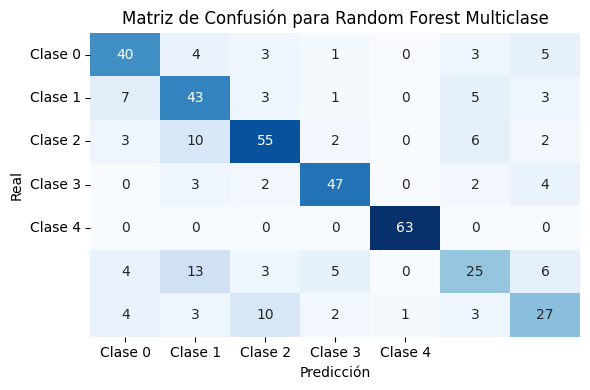

Modelo de Random Forest Multiclase
Exactitud: 0.71
Matriz de Confusión:
[[40  4  3  1  0  3  5]
 [ 7 43  3  1  0  5  3]
 [ 3 10 55  2  0  6  2]
 [ 0  3  2 47  0  2  4]
 [ 0  0  0  0 63  0  0]
 [ 4 13  3  5  0 25  6]
 [ 4  3 10  2  1  3 27]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.69      0.71      0.70        56
      Normal_Weight       0.57      0.69      0.62        62
     Obesity_Type_I       0.72      0.71      0.71        78
    Obesity_Type_II       0.81      0.81      0.81        58
   Obesity_Type_III       0.98      1.00      0.99        63
 Overweight_Level_I       0.57      0.45      0.50        56
Overweight_Level_II       0.57      0.54      0.56        50

           accuracy                           0.71       423
          macro avg       0.70      0.70      0.70       423
       weighted avg       0.71      0.71      0.71       423



In [ ]:
from sklearn.metrics import classification_report


# Modelo drandom forest
modelo_random_forest = RandomForestClassifier()
modelo_random_forest.fit(X_train, y_train)  # Asegúrate de que y_train contenga las etiquetas multiclase

def evaluar_random_forest_multiclase(X_test, y_test):
    # Predicciones de probabilidad para todas las clases
    y_probabilidades = modelo_random_forest.predict_proba(X_test)

    # Matriz de confusión
    matriz_confusion = confusion_matrix(y_test, modelo_random_forest.predict(X_test))

    # Gráficos
    # (La curva ROC no es relevante para problemas de clasificación multiclase)

    plt.figure(figsize=(6, 4))
    sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4'],
                yticklabels=['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4'])
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title('Matriz de Confusión para Random Forest Multiclase')

    plt.tight_layout()
    plt.show()

    # Métricas multiclase
    exactitud = accuracy_score(y_test, modelo_random_forest.predict(X_test))
    print('Modelo de Random Forest Multiclase')
    print(f'Exactitud: {exactitud:.2f}')
    print(f'Matriz de Confusión:\n{matriz_confusion}')

    # Informe de clasificación, incluyendo sensibilidad (recall)
    report = classification_report(y_test, modelo_random_forest.predict(X_test))
    print(report)

# Evaluar modelo de Random Forest multiclase
evaluar_random_forest_multiclase(X_test, y_test)  # Asegúrate de que y_test contenga las etiquetas multiclase



En la fase inicial de análisis de modelos, se implementó un modelo Random Forest de clasificación multiclase. Este enfoque capitaliza la construcción de múltiples árboles de decisión, combinando así su poder predictivo. Para evaluar el poder predictivo del modelo, se llevó a cabo una medición de su exactitud. Además, para un análisis más detallado, se generó una matriz de confusión que desglosa las categorías y se evaluaron también métricas adicionales como precisión, recall, f1-score y support.

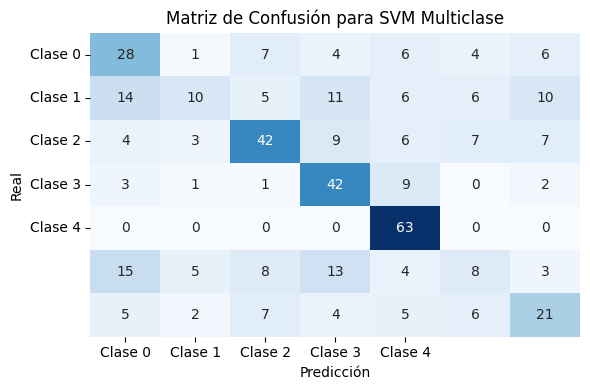

Modelo de SVM Multiclase
Exactitud: 0.51
Matriz de Confusión:
[[28  1  7  4  6  4  6]
 [14 10  5 11  6  6 10]
 [ 4  3 42  9  6  7  7]
 [ 3  1  1 42  9  0  2]
 [ 0  0  0  0 63  0  0]
 [15  5  8 13  4  8  3]
 [ 5  2  7  4  5  6 21]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.41      0.50      0.45        56
      Normal_Weight       0.45      0.16      0.24        62
     Obesity_Type_I       0.60      0.54      0.57        78
    Obesity_Type_II       0.51      0.72      0.60        58
   Obesity_Type_III       0.64      1.00      0.78        63
 Overweight_Level_I       0.26      0.14      0.18        56
Overweight_Level_II       0.43      0.42      0.42        50

           accuracy                           0.51       423
          macro avg       0.47      0.50      0.46       423
       weighted avg       0.48      0.51      0.47       423



In [ ]:
from sklearn.svm import SVC

# Modelo de SVM multiclase (asegúrate de que está previamente entrenado)
modelo_svm = SVC()
modelo_svm.fit(X_train, y_train)  # Asegúrate de que y_train contenga las etiquetas multiclase

def evaluar_svm_multiclase(X_test, y_test):
    # Predicciones de clase
    y_pred = modelo_svm.predict(X_test)

    # Matriz de confusión
    matriz_confusion = confusion_matrix(y_test, y_pred)

    # Gráficos
    plt.figure(figsize=(6, 4))
    sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4'],
                yticklabels=['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4'])
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title('Matriz de Confusión para SVM Multiclase')

    plt.tight_layout()
    plt.show()

    # Métricas multiclase
    exactitud = accuracy_score(y_test, y_pred)
    print('Modelo de SVM Multiclase')
    print(f'Exactitud: {exactitud:.2f}')
    print(f'Matriz de Confusión:\n{matriz_confusion}')

    # Informe de clasificación, incluyendo sensibilidad (recall)
    report = classification_report(y_test, y_pred)
    print(report)

# Evaluar modelo de SVM multiclase
evaluar_svm_multiclase(X_test, y_test)  # Asegúrate de que y_test contenga las etiquetas multiclase


Siguiendo el contexto de la clasificación multiclase, se empleó un segundo de Máquinas de Soporte Vectorial (SVM). Este modelo se destaca por su capacidad para manejar múltiples clases de manera eficiente. Para evaluar su rendimiento se aplicaron las mismas métricas y gráficas del modelo anterior.

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


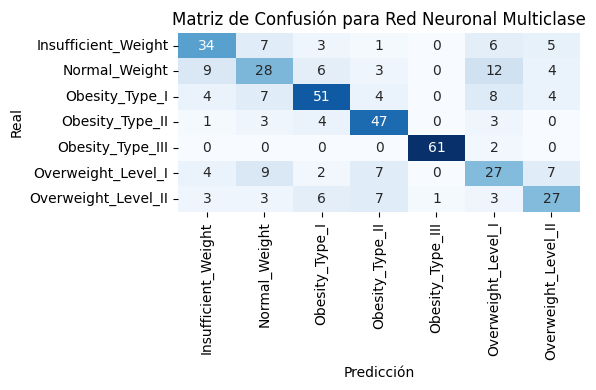

Modelo de Red Neuronal Multiclase
Exactitud: 0.65
Matriz de Confusión:
[[34  7  3  1  0  6  5]
 [ 9 28  6  3  0 12  4]
 [ 4  7 51  4  0  8  4]
 [ 1  3  4 47  0  3  0]
 [ 0  0  0  0 61  2  0]
 [ 4  9  2  7  0 27  7]
 [ 3  3  6  7  1  3 27]]
                     precision    recall  f1-score   support

Insufficient_Weight       0.62      0.61      0.61        56
      Normal_Weight       0.49      0.45      0.47        62
     Obesity_Type_I       0.71      0.65      0.68        78
    Obesity_Type_II       0.68      0.81      0.74        58
   Obesity_Type_III       0.98      0.97      0.98        63
 Overweight_Level_I       0.44      0.48      0.46        56
Overweight_Level_II       0.57      0.54      0.56        50

           accuracy                           0.65       423
          macro avg       0.64      0.64      0.64       423
       weighted avg       0.65      0.65      0.65       423



In [ ]:


from sklearn.neural_network import MLPClassifier


# Escalar las características (puedes personalizar esto según tus necesidades)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Entrenar una red neuronal
modelo_red_neuronal = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
modelo_red_neuronal.fit(X_train, y_train)

def evaluar_red_neuronal_multiclase(X_test, y_test):
    # Predicciones de clase
    y_pred = modelo_red_neuronal.predict(X_test)

    # Matriz de confusión
    matriz_confusion = confusion_matrix(y_test, y_pred)

    # Gráficos
    plt.figure(figsize=(6, 4))
    sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=modelo_red_neuronal.classes_,
                yticklabels=modelo_red_neuronal.classes_)
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title('Matriz de Confusión para Red Neuronal Multiclase')

    plt.tight_layout()
    plt.show()

    # Métricas multiclase
    exactitud = accuracy_score(y_test, y_pred)
    print('Modelo de Red Neuronal Multiclase')
    print(f'Exactitud: {exactitud:.2f}')
    print(f'Matriz de Confusión:\n{matriz_confusion}')

    # Informe de clasificación, incluyendo sensibilidad (recall)
    report = classification_report(y_test, y_pred, target_names=modelo_red_neuronal.classes_)
    print(report)

# Evaluar modelo de Red Neuronal Multiclase
evaluar_red_neuronal_multiclase(X_test, y_test)  # Asegúrate de que y_test contenga las etiquetas multiclase



Como tercer modelo y aprovechando las capacidades de los modelos más avanzados de analítica, se incorporó una red neuronal para abordar la tarea de clasificación multiclase. Este tipo de modelo, inspirado en la estructura del cerebro humano, demuestra su eficacia al tratar con múltiples categorías. La evaluación del modelo se realizó mediante las mismas métricas de los modelos anteriores.